# Algorithm: Grover's search algorithm

**GOAL**: Find $\omega$, given an oracle $U_f$ with 
$$f:\{0,1\}^n \to \{0,1\}, \qquad f(x)=\begin{cases}
1& \text{if }x == \omega \\  0 & else\end{cases} \qquad f_0(x)=\begin{cases}
0 & \text{if } x = 00...0 \\ 1 & else
\end{cases}$$

In [29]:
import numpy as np

from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *
from qiskit.quantum_info import Operator

from qiskit.visualization import plot_histogram


In [30]:
def compute_r(n):
    # return the sufficient number of iterations for the
    # algorithm to converge
    return np.ceil( (np.pi/4)*np.sqrt(2**n) ).astype(int)


In [44]:
def Uf(n, indexes, name):
    # create a quantum circuit on n qubits
    qc = QuantumCircuit(n, name=name)
    
    # create the identity matrix on n qubits
    oracle_matrix = np.identity(2**n)
    # add the -1 phase to marked elements
    for index in indexes:
        oracle_matrix[index, index] = -1

    # convert your matrix (called oracle_matrix) into an operator, and add it to the quantum circuit
    qc.unitary(Operator(oracle_matrix), range(n))
    
    return qc

In [45]:
def gr_algorithm(n, ws, r = 0):
    gr_circuit = QuantumCircuit(n,n)
    
    # Set up the input register:
    # Initialize |s >
    for qubit in range(n):
        gr_circuit.h(qubit)
    
    # If r is default, compute automatically the sufficient
    # number of iterations
    if r == 0:
        r = compute_r(n)
        
    for _ in range(r):
        gr_circuit.append(Uf(n, ws, 'Uf_'+str(_)), range(n))
        for qubit in range(n):
            gr_circuit.h(qubit)
        gr_circuit.append(Uf(n, [0], 'Uf0_'+str(_)), range(n))
        for qubit in range(n):
            gr_circuit.h(qubit)
    
    # Finally measure
    for i in range(n):
        gr_circuit.measure(i,i)
        
    return gr_circuit

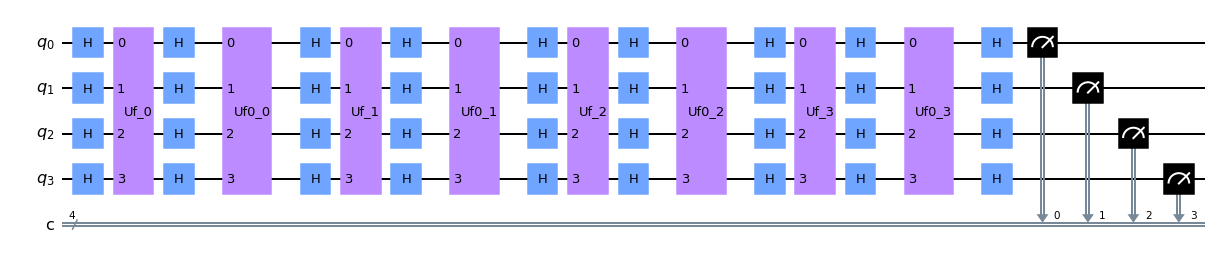

In [46]:
test = gr_algorithm(4, [0,5,7])
test.draw()

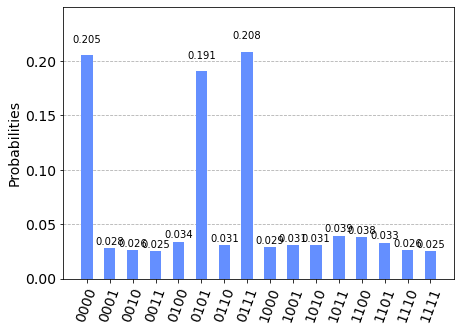

In [47]:
simulator = BasicAer.get_backend('qasm_simulator')
counts = execute(test, backend=simulator, shots=1000).result().get_counts(test)
plot_histogram(counts)